In [1]:
from typing import Dict

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from backtest import run_backtest

Total emissions: 314175 lbs/MWh


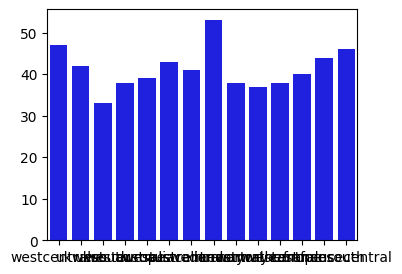

In [17]:
CLIENTS_PER_ROUND = 3

def random_strategy(location_forecasts: Dict[str, pd.DataFrame]) -> str:
    return np.random.choice(list(location_forecasts.keys()), size=CLIENTS_PER_ROUND, replace=False)

selections, emissions = run_backtest("history.csv", random_strategy)
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=list(selections.keys()), y=list(selections.values()), color="blue", ax=ax)
print(f"Total emissions: {sum(emissions.values()):.0f} lbs/MWh")

In [21]:
# TODO This does not work yet

def lowest_delta(forecast, window):
    """Returns the lowest delta of and forecasted value compared to 'now'"""
    min_delta = (forecast[1:window + 1] - forecast[0]).min()
    print(forecast[0], forecast[1:window + 1], min_delta)
    return min_delta

def carbon_aware_strategy1(location_forecasts: Dict[str, pd.DataFrame]) -> str:
    for location, forecast in location_forecasts.items():
        print(location, forecast.values)

selections, emissions = run_backtest("history.csv", carbon_aware_strategy1)
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=list(selections.keys()), y=list(selections.values()), color="blue", ax=ax)
print(f"Total emissions: {sum(emissions.values()):.0f} lbs/MWh")

australiacentral [[835.51714554]
 [839.59947687]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [836.42433028]
 [835.97073791]
 [835.97073791]
 [835.97073791]
 [835.97073791]
 [835.97073791]
 [817.82704311]
 [817.82704311]
 [817.82704311]
 [817.82704311]
 [817.82704311]
 [817.82704311]
 [835.97073791]
 [836.42433028]
 [836.42433028]
 [836.42433028]
 [836.42433028]
 [867.26861144]
 [840.50666161]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [846.85695479]]
australiaeast [[835.51714554]
 [839.59947687]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [840.05306924]
 [836.42433028]
 [835.97073791]
 [835.97073791]
 [835.97073791]
 [835.97073791]
 [835.97073791]
 [817.82704311]
 [817.82704311]
 [817.82704311]
 [817.82704311]
 [817.82704311]
 [817.82704311]
 [835.97073791]
 [836.42433028]
 [836.42433028]
 [836.42433028]
 [836.42

TypeError: 'NoneType' object is not iterable